In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [239]:
data = pd.read_csv('adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [240]:
data.shape

(48842, 15)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [242]:
data.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [243]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:xlabel='age'>

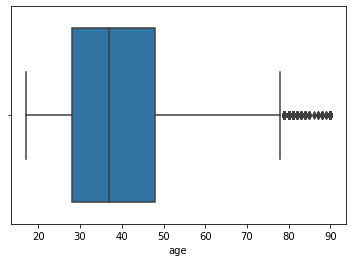

In [244]:
# Age Analysis
sns.boxplot(data['age'])

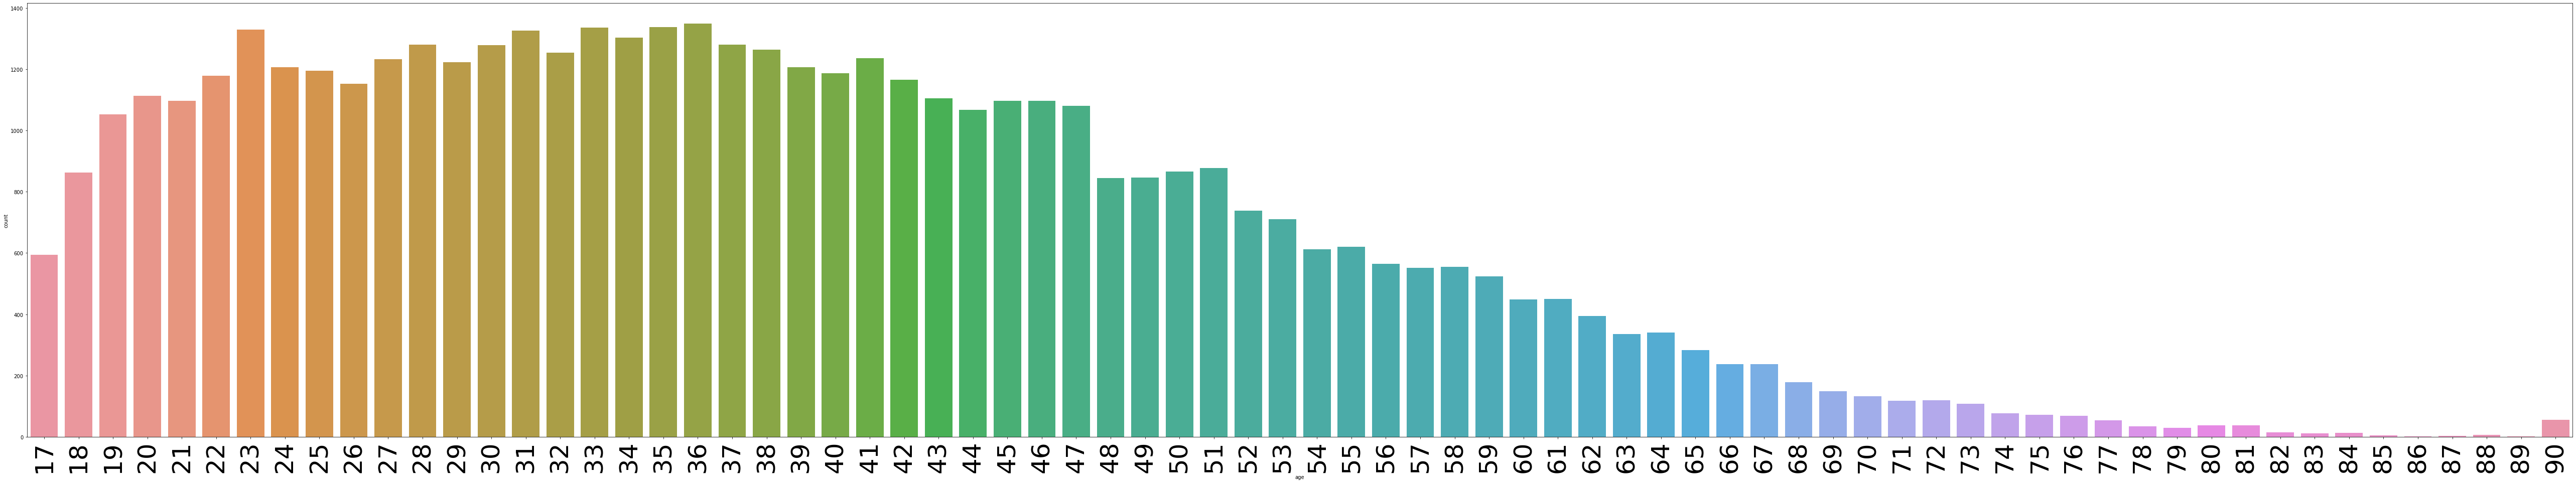

In [245]:
Fig = plt.figure(figsize = (200, 35))
A1 = Fig.add_subplot(222)
A = sns.countplot(data['age'] , ax = A1)
for item in A.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

- People aging more then 77-78 are considered as outliers.
- People of age 23 are having maximum count of 1300+

<AxesSubplot:xlabel='income', ylabel='age'>

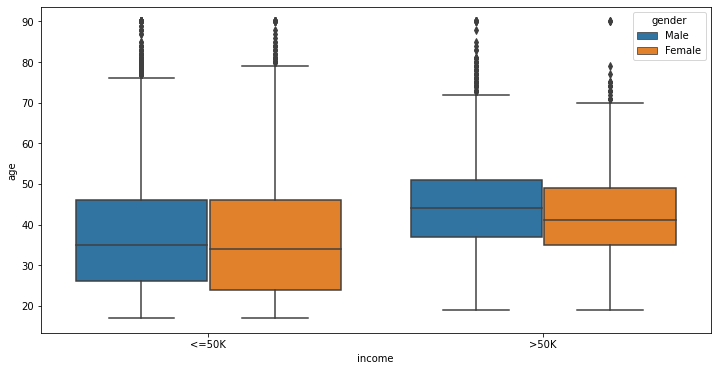

In [246]:
# Income and Age
plt.figure(figsize = (12,6))
sns.boxplot(x = "income", y = "age", data = data, hue = 'gender')

- For groups having income < 50,000 : Mean age of males are around 35,000 and for females are around 34,000.
- For groups having income < 50,000 : Mean age of males are around 45,000 and that for females are around 41,000.

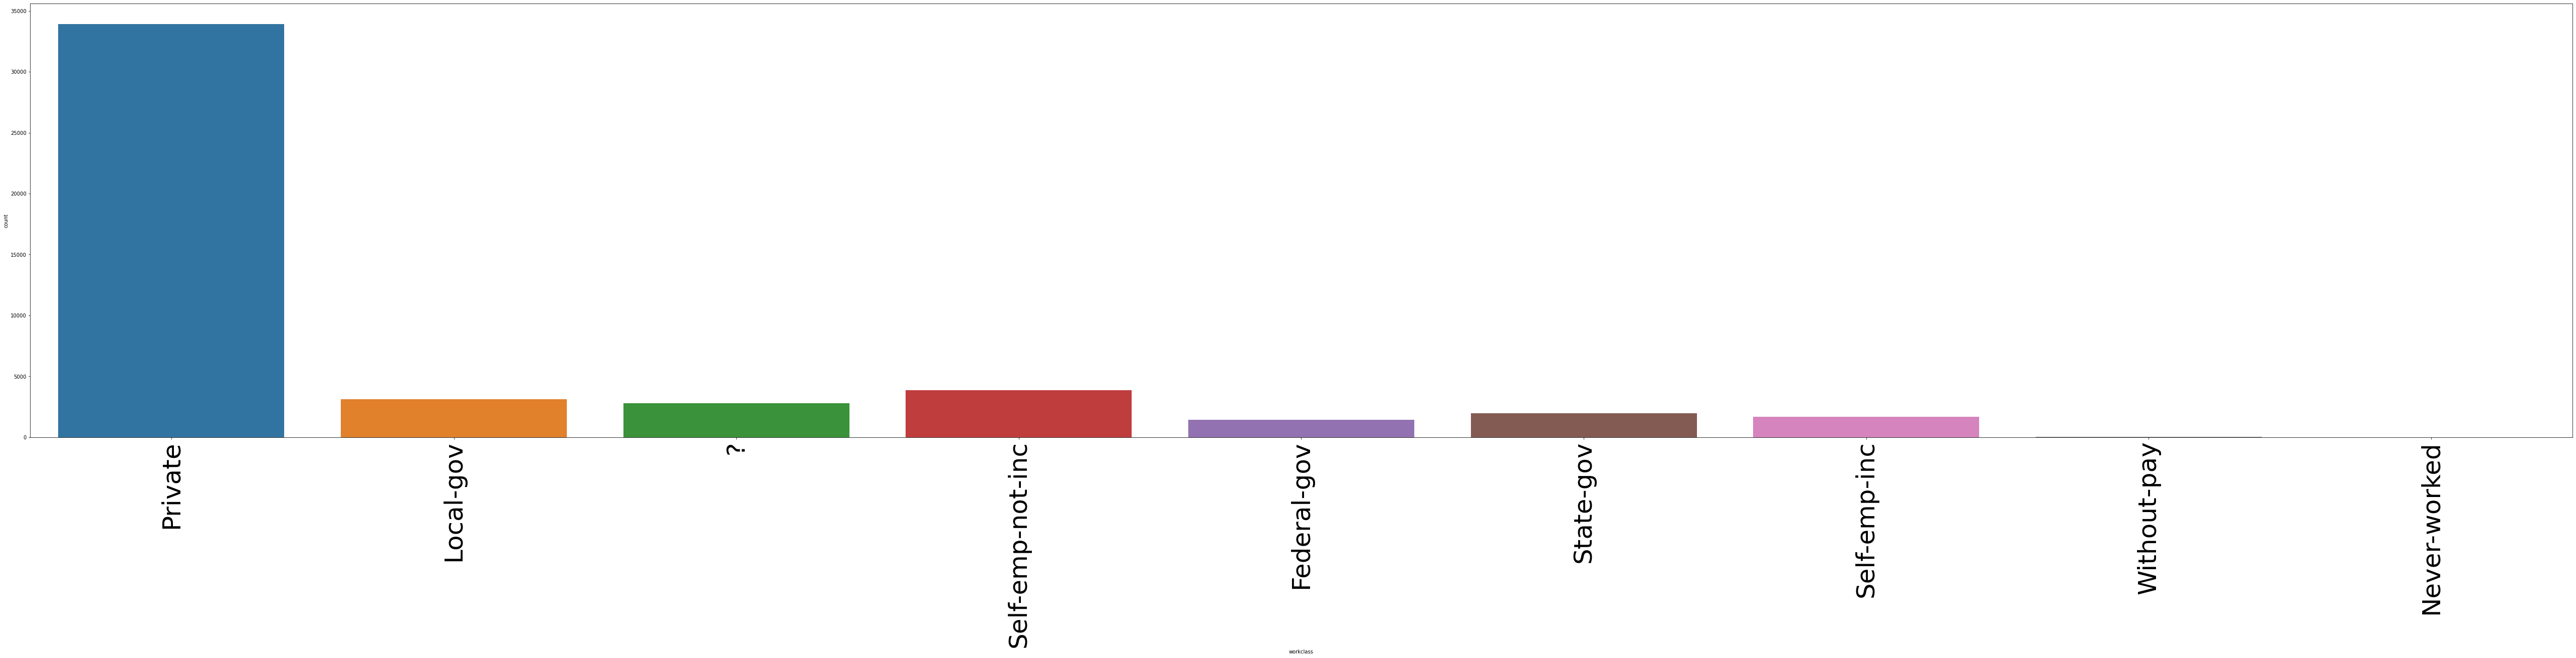

In [247]:
# WORKCLASS ANALYSIS
Fig = plt.figure(figsize = (200, 35))
A2 = Fig.add_subplot(222)
B = sns.countplot(data['workclass'] , ax = A2)
for item in B.get_xticklabels():
    item.set_rotation(90)    
    item.set_fontsize(50)
plt.show()

- Highest are Private workers with count of around 34,000.
- Second highest are self employed with count of around 5,000.

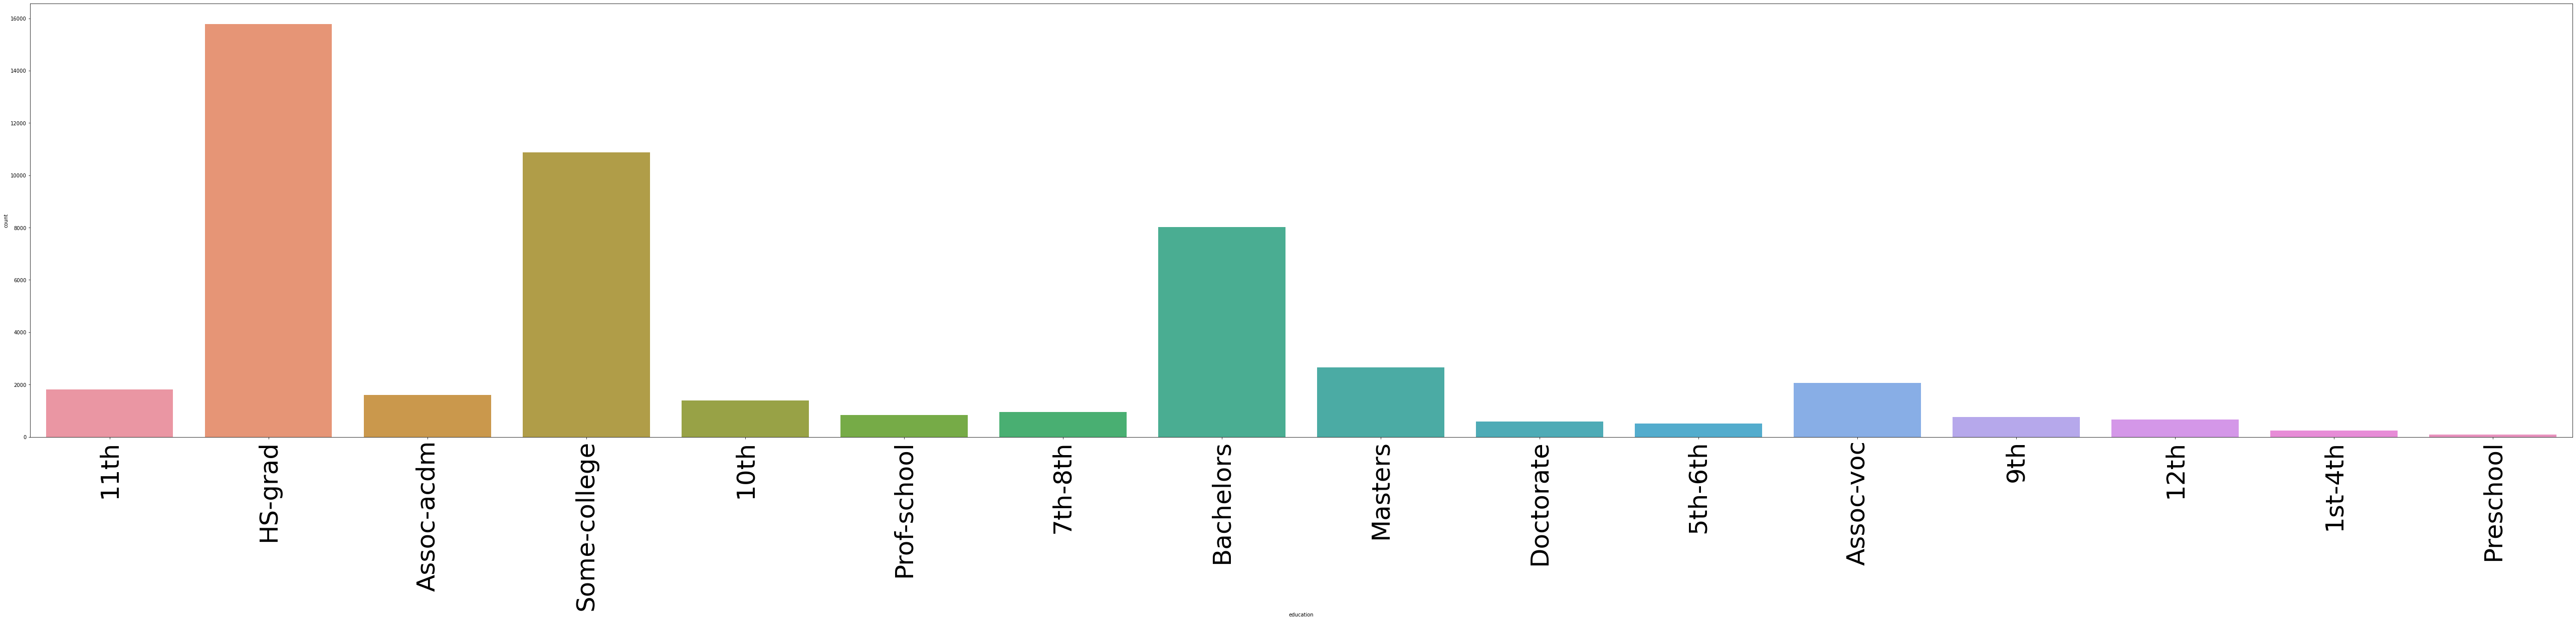

In [248]:
# Education
Fig = plt.figure(figsize = (200, 35))
A3 = Fig.add_subplot(222)
C = sns.countplot(data['education'] , ax = A3)
for item in C.get_xticklabels():
    item.set_rotation(90)    
    item.set_fontsize(50)
plt.show()

- HS-Graduates are the highest one having 16,000 count.
- Some-college are second highest having 10,000+ count.
- Bachelors degree holders rank 3 with around 8,000+ count.

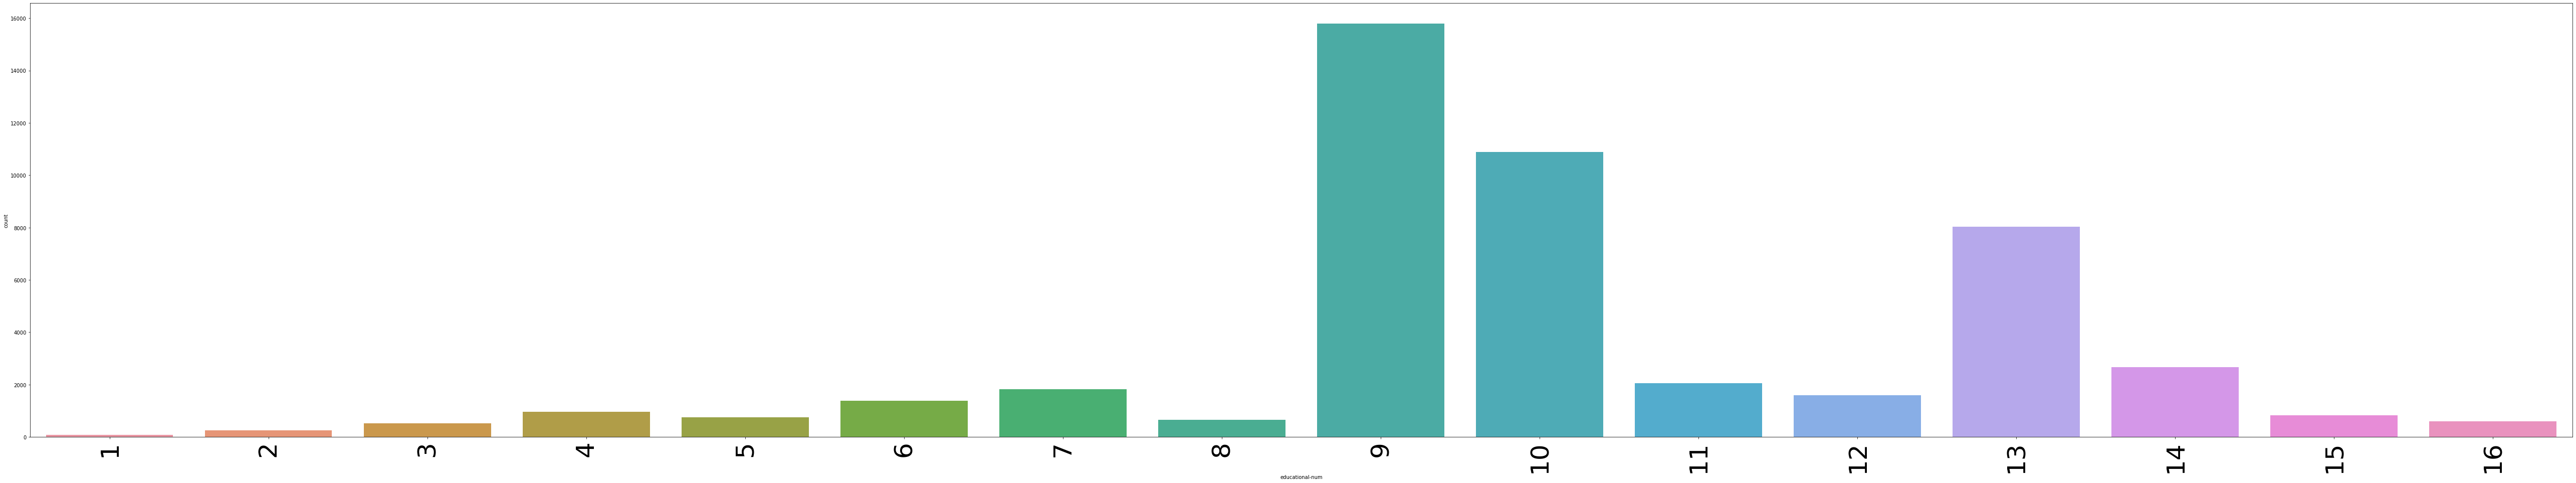

In [249]:
# EDUCATIONAL-NUM
Fig = plt.figure(figsize = (200, 35))
A4 = Fig.add_subplot(222)
D = sns.countplot(data['educational-num'] , ax = A4)
for item in D.get_xticklabels():
    item.set_rotation(90)   
    item.set_fontsize(50)
plt.show()

- Educational-num 9 has the highest count of around 15,000.

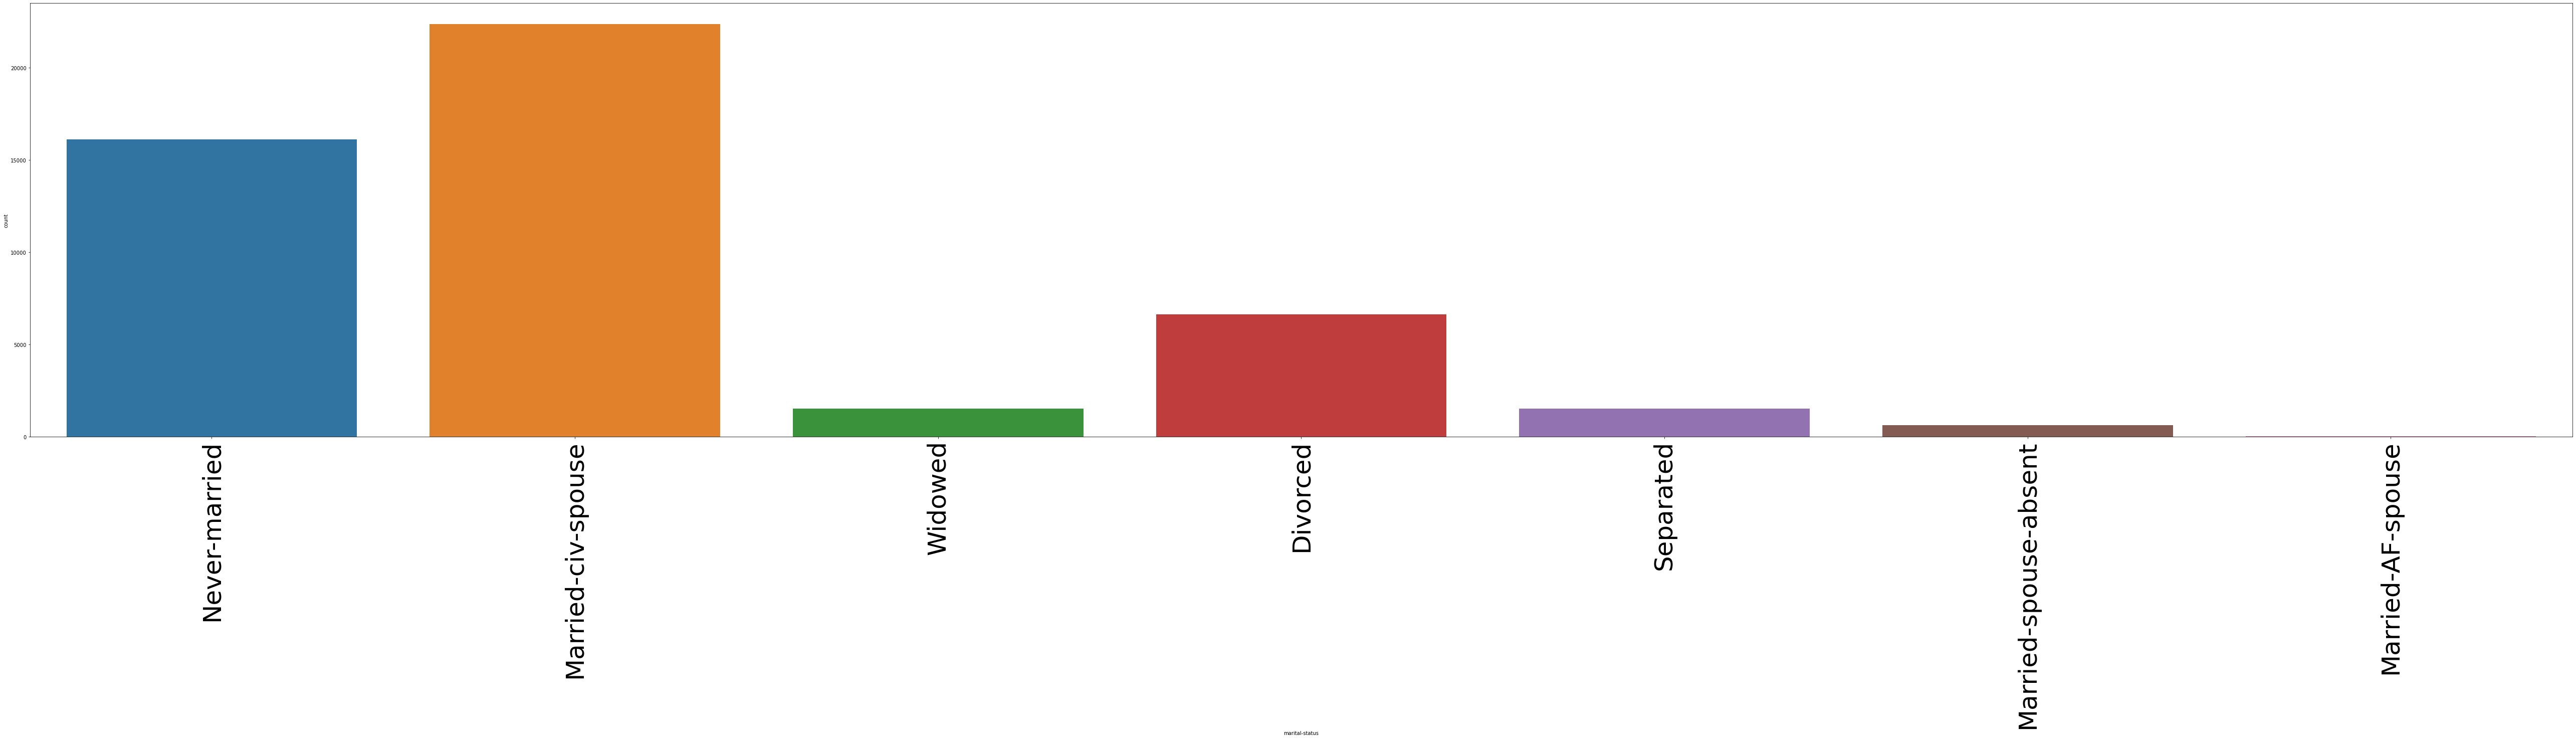

In [250]:
# Marital Status
Fig = plt.figure(figsize = (200, 35))
A5 = Fig.add_subplot(222)
E = sns.countplot(data['marital-status'] , ax = A5)
for item in E.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

- Married with spouse are the highest with count of around 20,000+
- Second-ones are the never-married ones with count of around 15,000+
- Third-ones are Divorced ones with count of 5,000+

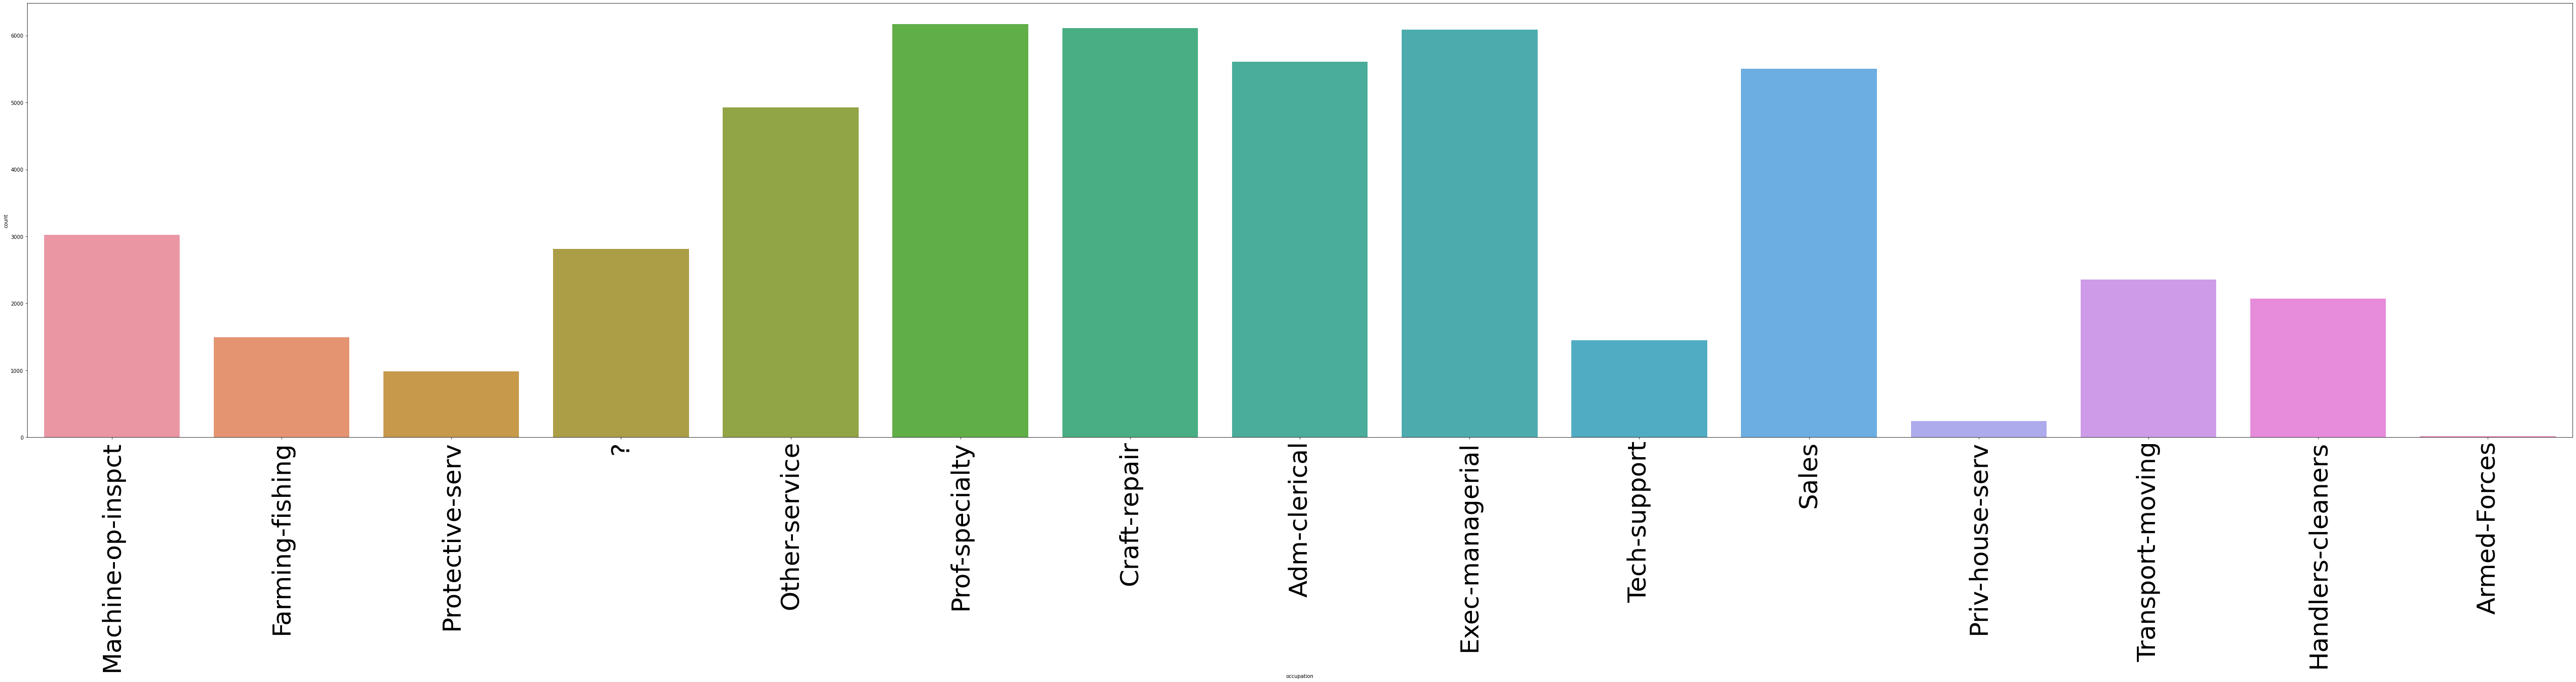

In [251]:
# OCCUPATION
Fig = plt.figure(figsize = (200, 35))
A6 = Fig.add_subplot(222)
F = sns.countplot(data['occupation'] , ax = A6)
for item in F.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

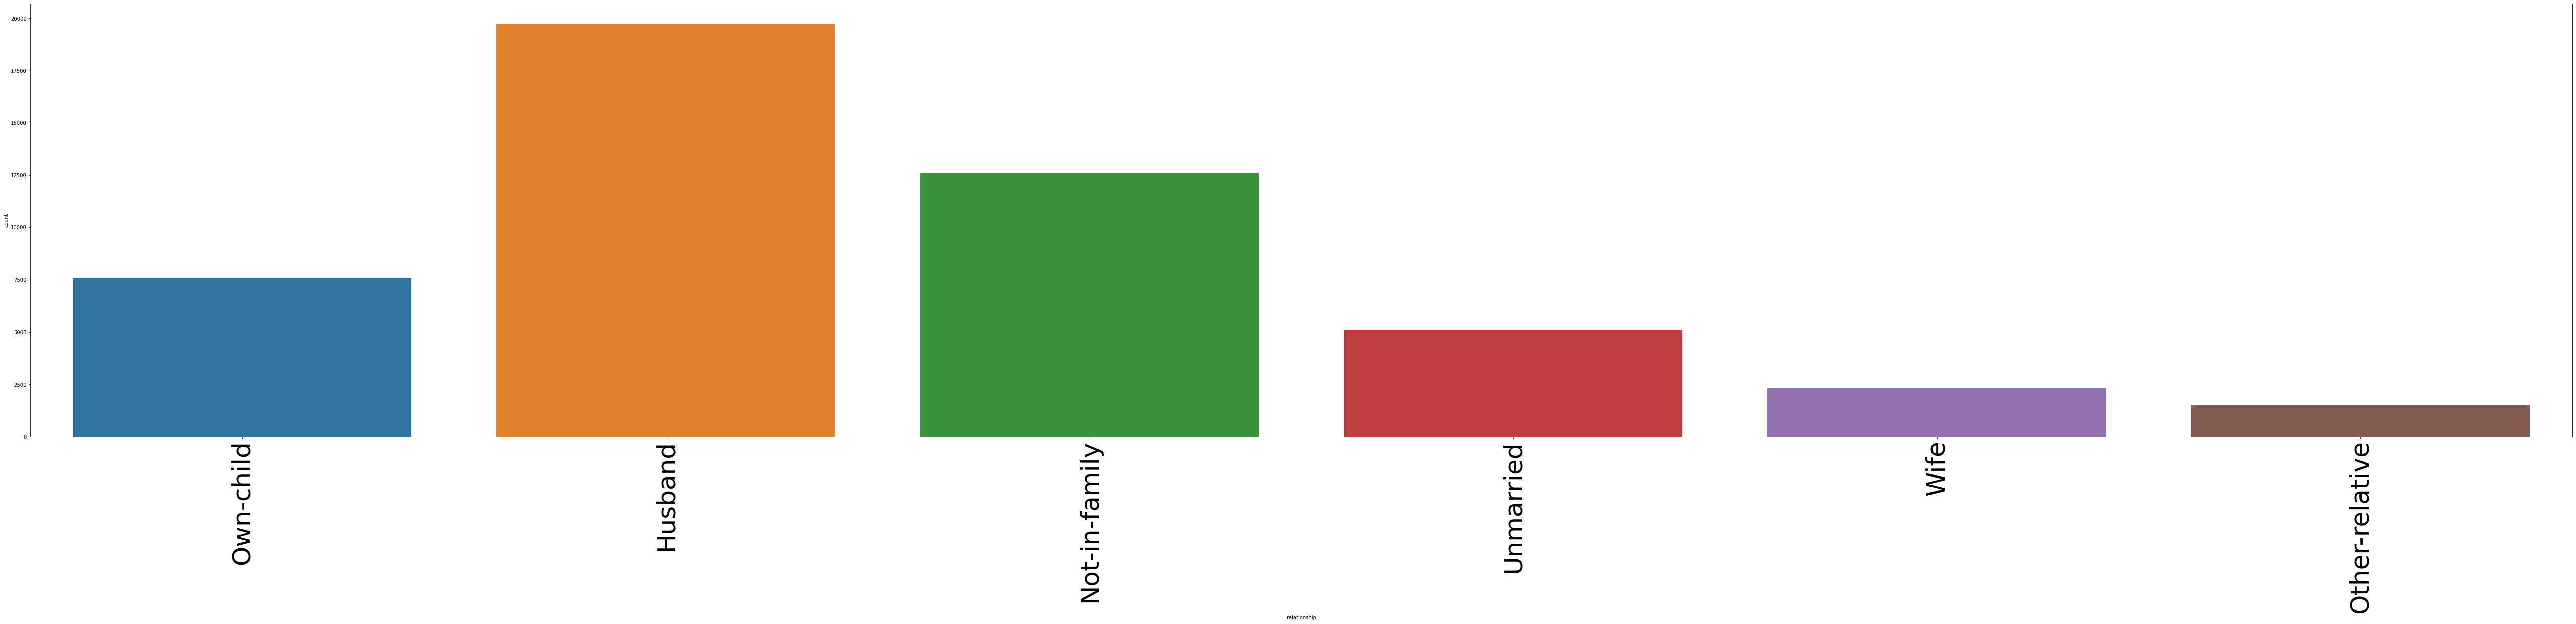

In [252]:
# RELATIONSHIP
Fig = plt.figure(figsize = (200, 35))
A7 = Fig.add_subplot(222)
G = sns.countplot(data['relationship'] , ax = A7)
for item in G.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

> Top 3 are :
- Husband : 18,000-19,000
- Not in family : Around 12,500
- Own-child : 7,500

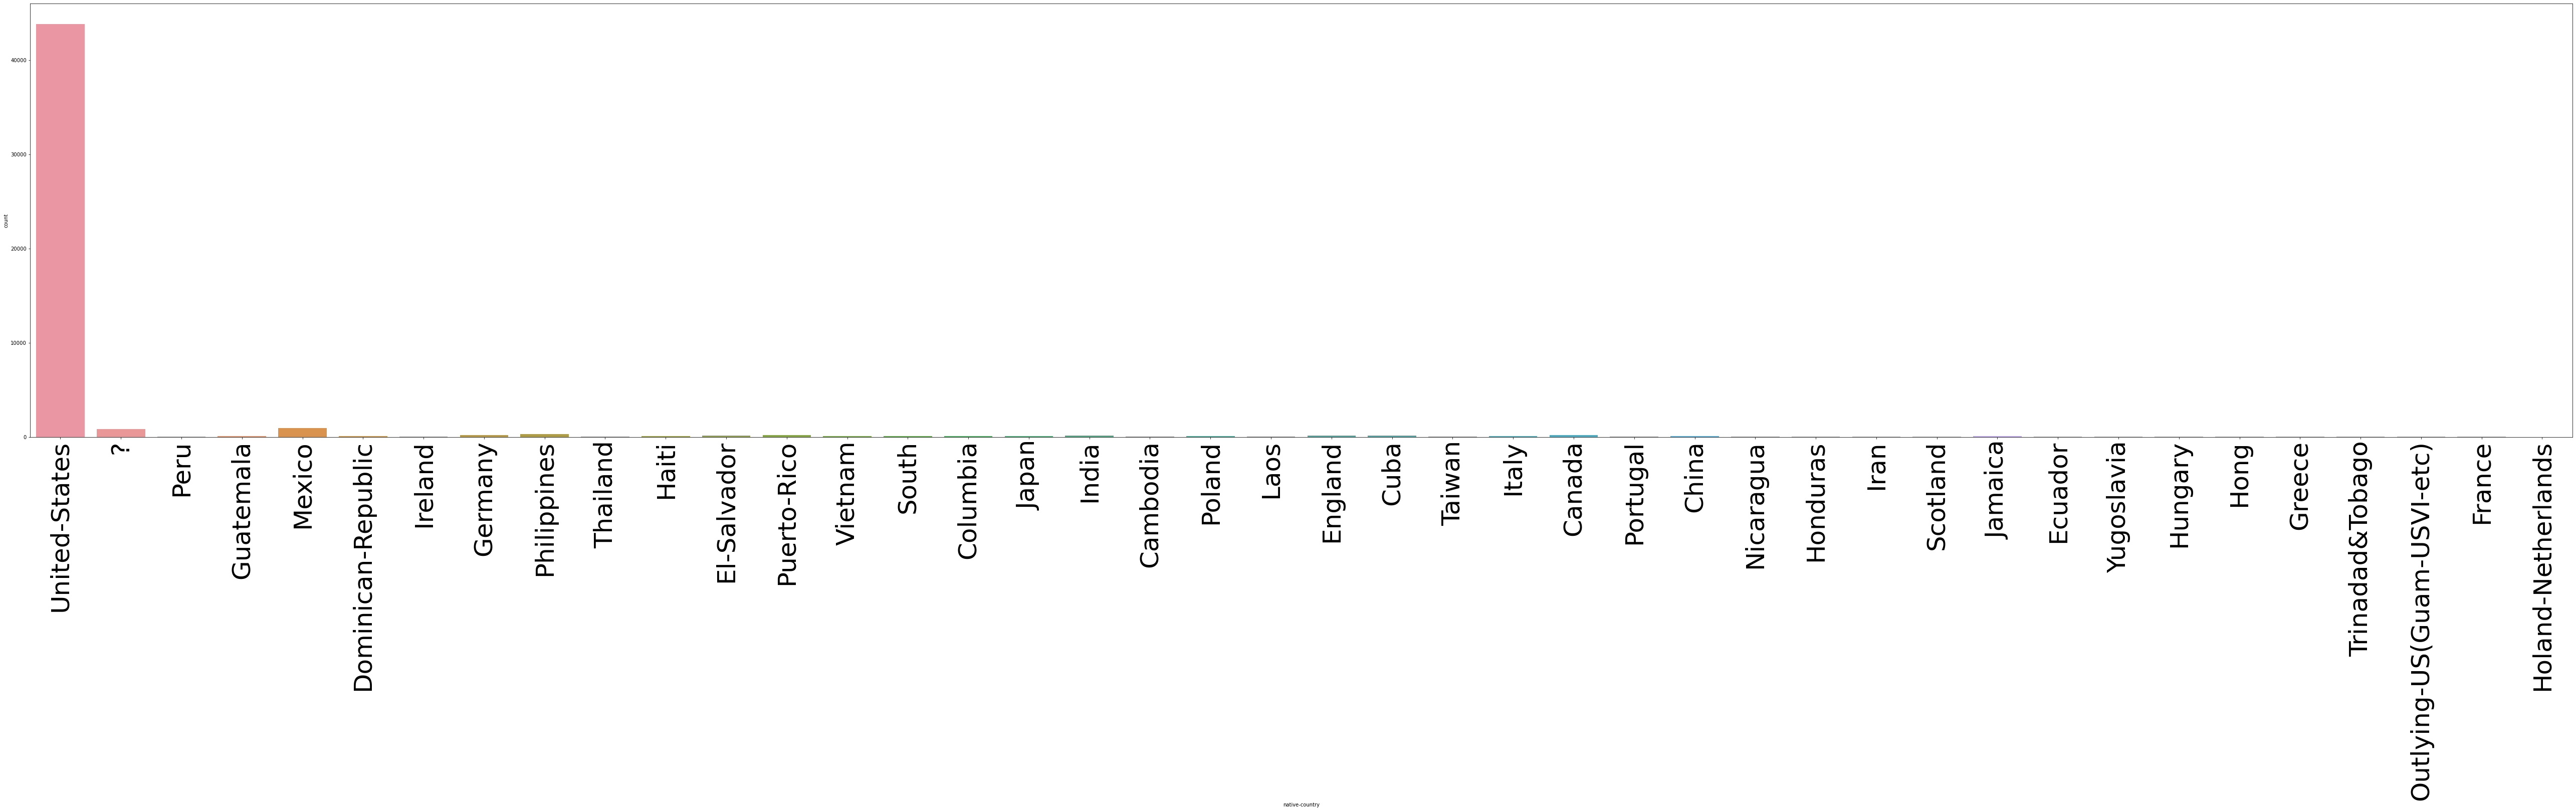

In [253]:
# NATIVE COUNTRY
Fig = plt.figure(figsize = (200, 35))
A8 = Fig.add_subplot(222)
H = sns.countplot(data['native-country'] , ax = A8)
for item in H.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

> Top 3 are :
- United States : Around 45,000
- Mexico : Around 1,000-2,000

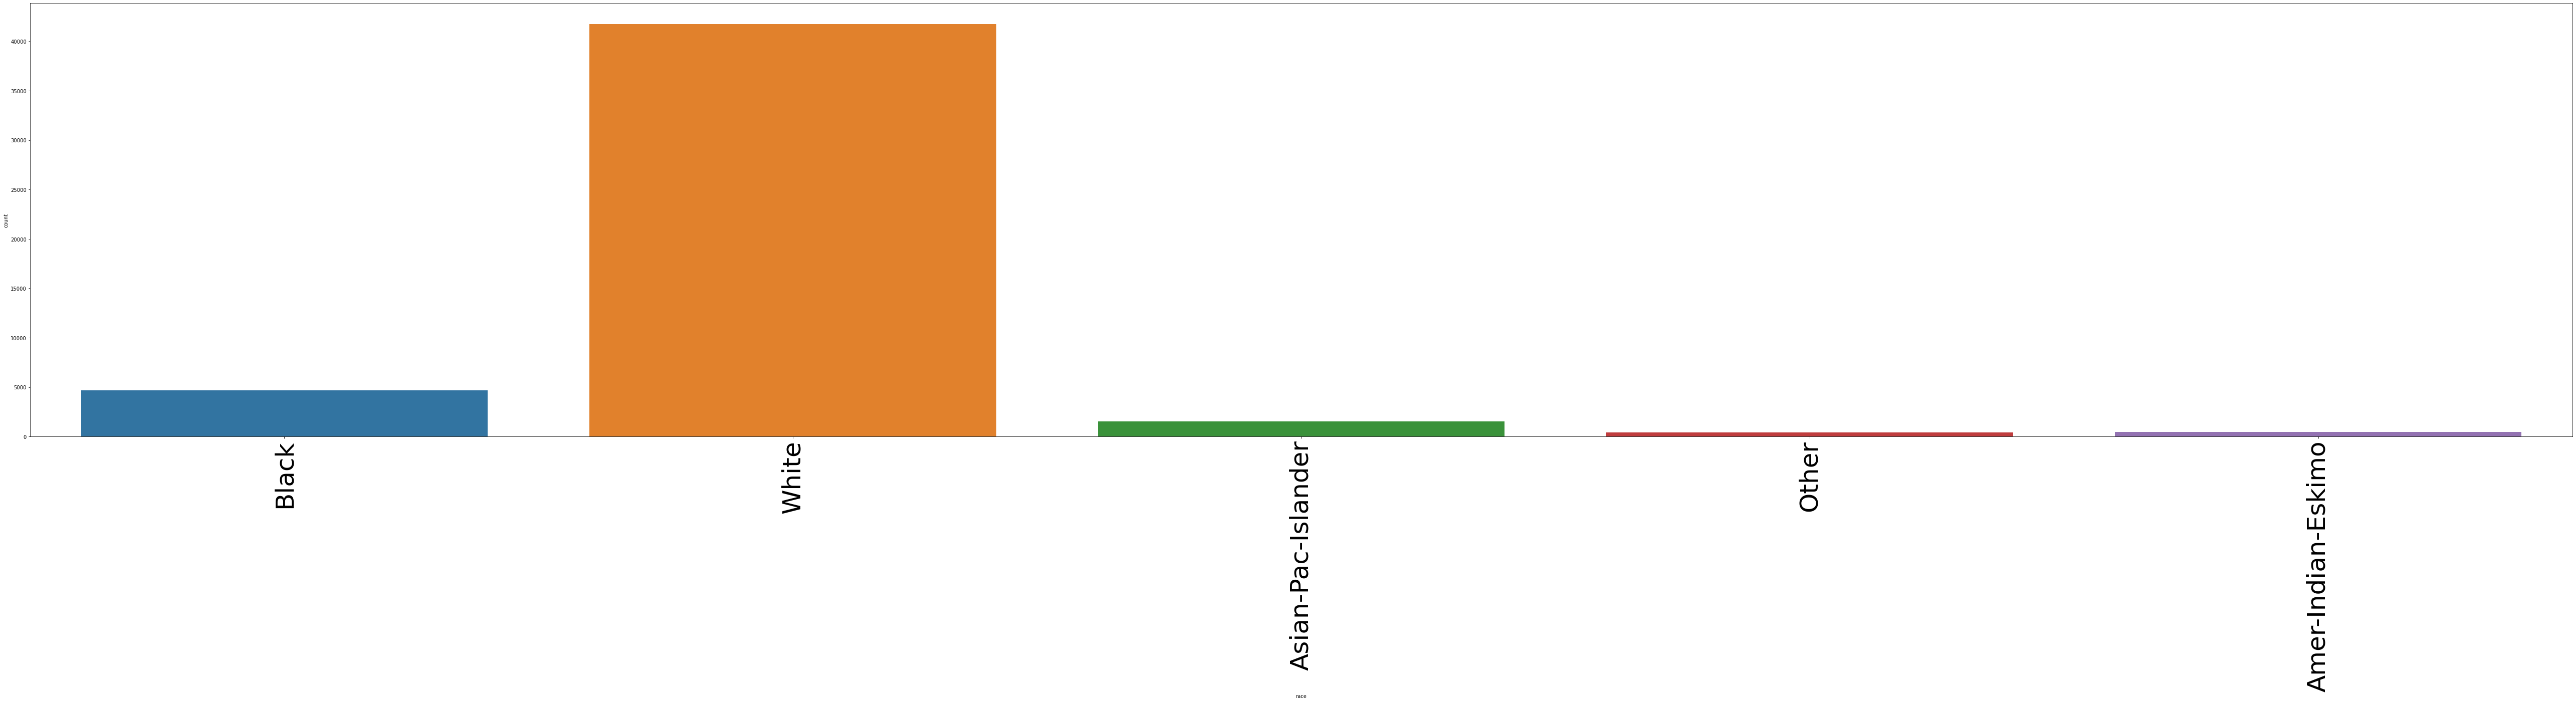

In [254]:
# Race
Fig = plt.figure(figsize = (200, 35))
A9 = Fig.add_subplot(222)
I = sns.countplot(data['race'] , ax = A9)
for item in I.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(50)
plt.show()

## Correlation

In [255]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


Text(0.5, 1.0, 'Heatmap showing correlations between numerical data')

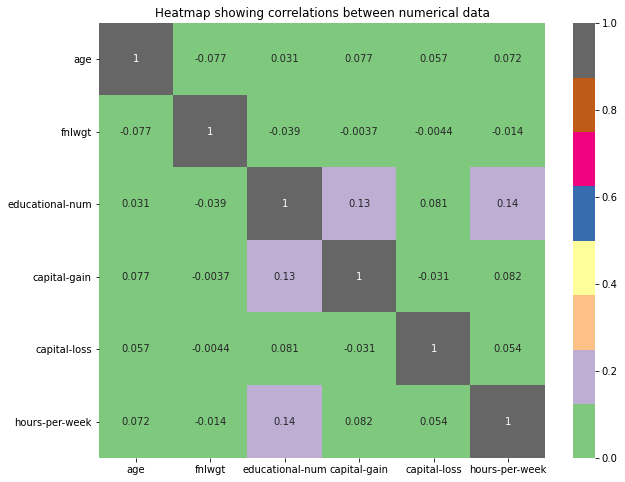

In [256]:
plt.figure(figsize = (10,8))  
sns.heatmap(data.corr(),vmin = 0, vmax = 1, cmap = 'Accent', annot=True)
data.corr()
plt.title('Heatmap showing correlations between numerical data')

- There is no such correlation between any such feature.

In [257]:
# Comparison between Income and Education
edu_level = {}
for x,y in data[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion of population')

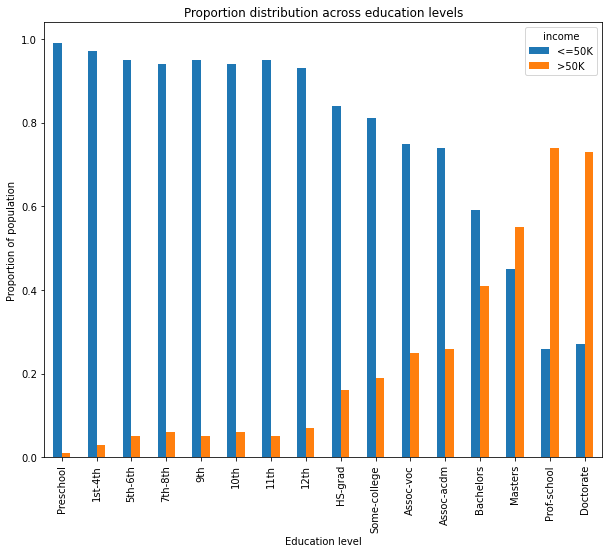

In [258]:
education = round(pd.crosstab(data.education, data.income).div(pd.crosstab(data.education, data.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key = edu_level.get, reverse = False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

- As one can interprete from tha graph that as the Education level increases, the proportion of people who earn more than 50,000/year increases as well.
- However, after obtaining a Master's degree only, the proportion of people earning more than 50,000/year becomes a majority.

Text(0, 0.5, 'Proportion of population')

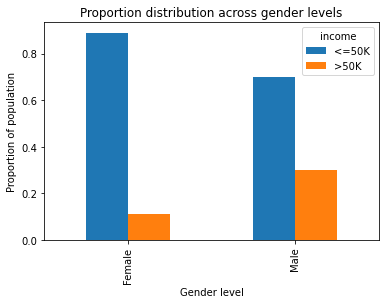

In [259]:
# Comparison between Income and Gender
gender = round(pd.crosstab(data.gender, data.income).div(pd.crosstab(data.gender, data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

- Proportion of males earning more then 50,000/year is double that of the females.
- Proportion of females earning less than 50,000/year is higher than males.

Text(17.200000000000003, 0.5, 'Proportion of population')

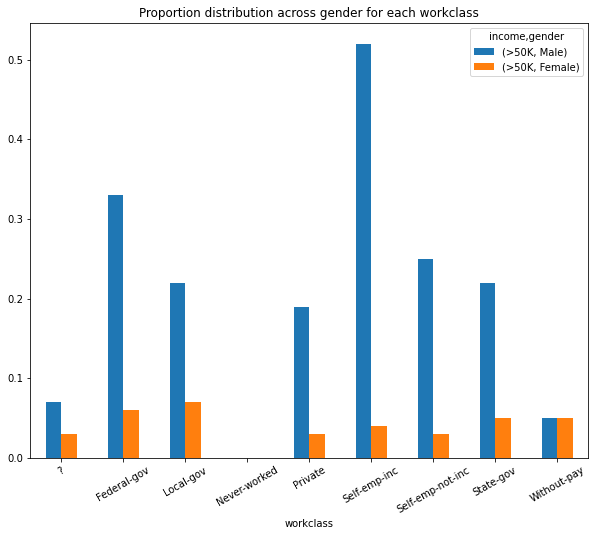

In [260]:
# Comparison between Income and Workclass
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.gender]).div(pd.crosstab(data.workclass, [data.income, data.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

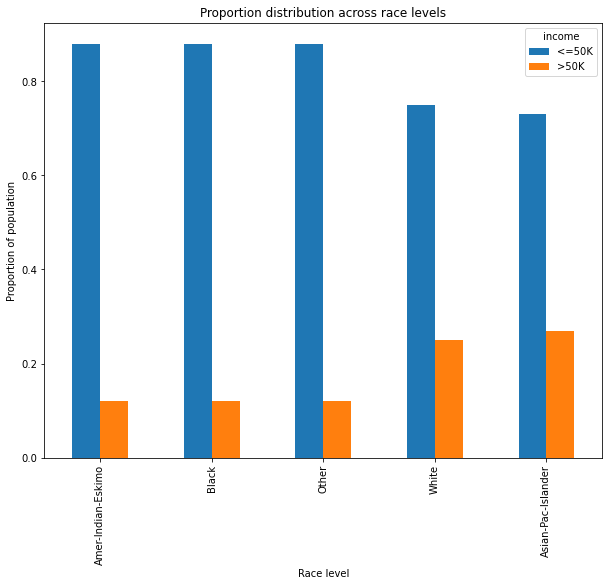

In [261]:
# Comparison between Income and Race
race = round(pd.crosstab(data.race, data.income).div(pd.crosstab(data.race, data.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

- People with income less than 50,000/year are in a very large proportion among various races.

In [262]:
print(data['native-country'].value_counts())
not_from_US = np.sum(data['native-country']!= 'United-States')
print('\n')
print(not_from_US, 'people not from the United States. ')

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [263]:
data['native-country'] = (data['native-country']=='United-States')*1

In [264]:
data.select_dtypes(exclude=[np.number]).head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,<=50K


In [265]:
data = data.applymap(lambda x: np.nan if x=='?' else x)

In [266]:
data.isnull().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [267]:
data.shape[0] - data.dropna(axis=0).shape[0]

2809

In [268]:
data = data.dropna(axis=0)

In [269]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,1,<=50K


# Hypothesis Testing
> <b>Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)</b>

- Null Hypothesis :- there is no relationship between "occupation" and "gender".
- Alternate Hypothesis :- there is some relationship between "occupation" and "gender".

In [270]:
data.shape

(46033, 15)

In [271]:
# contingency table
c_t = pd.crosstab(data['occupation'],data['gender'],margins = True) 
c_t

gender,Female,Male,All
occupation,,,
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923
Priv-house-serv,228,14,242


In [272]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [273]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

dof=28
p_value 0.0
[[1.81848911e+03 3.79251089e+03 5.61100000e+03]
 [4.86140378e+00 1.01385962e+01 1.50000000e+01]
 [1.98085999e+03 4.13114001e+03 6.11200000e+03]
 [1.97243356e+03 4.11356644e+03 6.08600000e+03]
 [4.82899442e+02 1.00710056e+03 1.49000000e+03]
 [6.71521908e+02 1.40047809e+03 2.07200000e+03]
 [9.79410814e+02 2.04258919e+03 3.02200000e+03]
 [1.59551272e+03 3.32748728e+03 4.92300000e+03]
 [7.84306476e+01 1.63569352e+02 2.42000000e+02]
 [2.00030561e+03 4.17169439e+03 6.17200000e+03]
 [3.18583994e+02 6.64416006e+02 9.83000000e+02]
 [1.78381109e+03 3.72018891e+03 5.50400000e+03]
 [4.68639324e+02 9.77360676e+02 1.44600000e+03]
 [7.63240393e+02 1.59175961e+03 2.35500000e+03]
 [1.49190000e+04 3.11140000e+04 4.60330000e+04]]


In [274]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Reject Null Hypothesis(H0)')
else:
    print('Fail to Reject Null Hypothesis(H0)')

probability=0.950, critical=41.337, stat=8690.694
Reject Null Hypothesis(H0)


- It means there is a relationship between occupation and gender, meaning the occupation of a person depends on gender.

> <b>Is there a relationship between gender and income?</b>

- Null Hypothesis :- there is no relationship between "Income" and "gender".
- Alternate Hypothesis :- there is some relationship between "Income" and "gender".

In [275]:
c_t1 = pd.crosstab(data['income'],data['gender'],margins = True) 
c_t1

gender,Female,Male,All
income,,,
<=50K,13225,21386,34611
>50K,1694,9728,11422
All,14919,31114,46033


In [276]:
stat, p, dof, expected = chi2_contingency(c_t1)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

dof=4
p_value 0.0
[[11217.20307171 23393.79692829 34611.        ]
 [ 3701.79692829  7720.20307171 11422.        ]
 [14919.         31114.         46033.        ]]


In [277]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Reject Null Hypothesis(H0)')
else:
    print('Fail to Reject Null Hypothesis(H0)')

probability=0.950, critical=9.488, stat=2142.869
Reject Null Hypothesis(H0)


- Here again we reject null hypothesis which means there is a relationship between Income and gender, meaning the Income of a person depends on gender

## Model Preparation

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X = data.drop("income", axis = 1)
y = data['income']

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=True)

In [281]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36826, 14), (9207, 14), (36826,), (9207,))

In [282]:
df_cat_train = X_train.select_dtypes(include='object')

In [283]:
df_num_train = X_train.select_dtypes(exclude='object')

In [284]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df_num_train_rescaled = pd.DataFrame(scaler.fit_transform(df_num_train), 
                                    columns = df_num_train.columns, 
                                    index = df_num_train.index)

df_num_train_rescaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country
43561,-1.023997,-0.711826,-0.438748,-0.147102,-0.218357,-0.076416,0.340896
14952,0.261891,-0.477371,0.341799,-0.147102,-0.218357,-0.076416,-2.933447
32068,0.186250,-0.142002,-0.438748,-0.147102,4.452177,0.337617,0.340896
19085,-1.023997,0.248741,0.732073,-0.147102,-0.218357,-0.076416,0.340896
14909,-0.267592,0.135370,-0.438748,-0.147102,-0.218357,1.579717,0.340896
...,...,...,...,...,...,...,...
46375,2.001621,-0.953590,-0.438748,-0.147102,-0.218357,-1.898163,0.340896
34496,1.093935,-0.358851,0.341799,0.430864,-0.218357,-0.076416,0.340896
5544,-0.645795,-0.299148,-0.048474,-0.147102,-0.218357,-0.076416,0.340896
12929,0.337531,-1.139979,-0.438748,-0.147102,-0.218357,-0.076416,0.340896


In [285]:
df_cat_train.head()

,workclass,education,marital-status,occupation,relationship,race,gender
43561,Private,HS-grad,Never-married,Handlers-cleaners,Other-relative,White,Male
14952,Private,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male
32068,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male
19085,Private,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female
14909,Private,HS-grad,Divorced,Sales,Not-in-family,White,Male


In [286]:
# One hot encoding
df_cat_train_dum=pd.get_dummies(df_cat_train, drop_first=True)

In [287]:
df_cat_train_dum.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
43561,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
14952,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32068,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
19085,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14909,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [288]:
# concatinate
df_train_final = pd.concat([df_num_train_rescaled,df_cat_train_dum],axis=1)
df_train_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
43561,-1.023997,-0.711826,-0.438748,-0.147102,-0.218357,-0.076416,0.340896,0,1,0,...,0,1,0,0,0,0,0,0,1,1
14952,0.261891,-0.477371,0.341799,-0.147102,-0.218357,-0.076416,-2.933447,0,1,0,...,0,0,0,0,0,1,0,0,0,1
32068,0.186250,-0.142002,-0.438748,-0.147102,4.452177,0.337617,0.340896,0,1,0,...,0,0,0,0,0,0,0,0,1,1
19085,-1.023997,0.248741,0.732073,-0.147102,-0.218357,-0.076416,0.340896,0,1,0,...,0,0,0,0,1,0,0,0,1,0
14909,-0.267592,0.135370,-0.438748,-0.147102,-0.218357,1.579717,0.340896,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,2.001621,-0.953590,-0.438748,-0.147102,-0.218357,-1.898163,0.340896,0,1,0,...,0,0,0,0,0,0,0,0,1,1
34496,1.093935,-0.358851,0.341799,0.430864,-0.218357,-0.076416,0.340896,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5544,-0.645795,-0.299148,-0.048474,-0.147102,-0.218357,-0.076416,0.340896,0,1,0,...,0,0,0,0,1,0,0,0,1,0
12929,0.337531,-1.139979,-0.438748,-0.147102,-0.218357,-0.076416,0.340896,0,1,0,...,0,1,0,0,0,0,0,0,1,1


In [289]:
# preparing test data
df_num_test= X_test.select_dtypes(exclude='object')
df_num_test.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country
11013,19,231492,9,0,0,60,1
17832,17,130806,6,0,0,24,1
46040,46,177633,9,0,0,50,1
28905,63,110890,14,0,0,70,1
30167,50,189107,9,0,0,40,1


In [290]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df_num_test_rescaled = pd.DataFrame(scaler.fit_transform(df_num_test), 
                                    columns = df_num_test.columns, 
                                    index = df_num_test.index)

df_num_test_rescaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country
11013,-1.494266,0.397400,-0.446475,-0.145723,-0.221142,1.613360,0.330571
17832,-1.646492,-0.578543,-1.613401,-0.145723,-0.221142,-1.451715,0.330571
46040,0.560782,-0.124652,-0.446475,-0.145723,-0.221142,0.761950,0.330571
28905,1.854701,-0.771587,1.498403,-0.145723,-0.221142,2.464769,0.330571
30167,0.865233,-0.013435,-0.446475,-0.145723,-0.221142,-0.089459,0.330571
...,...,...,...,...,...,...,...
17514,0.332443,2.159623,-0.446475,-0.145723,-0.221142,0.336245,0.330571
174,0.713008,-1.194790,1.498403,-0.145723,-0.221142,-0.089459,0.330571
44704,-0.276460,0.023553,-0.446475,-0.145723,5.570399,-0.089459,0.330571
15735,-0.733137,-1.205782,-0.057499,-0.145723,-0.221142,0.761950,0.330571


In [291]:
df_cat_test = X_test.select_dtypes(include='object')
df_cat_test.head()

,workclass,education,marital-status,occupation,relationship,race,gender
11013,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male
17832,Private,10th,Never-married,Handlers-cleaners,Own-child,White,Male
46040,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
28905,Self-emp-inc,Masters,Divorced,Prof-specialty,Not-in-family,White,Male
30167,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male


In [292]:
# One hot encoding
df_cat_test_dum=pd.get_dummies(df_cat_test, drop_first=True)
df_cat_test_dum

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
11013,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
17832,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
46040,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
28905,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
30167,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
174,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
44704,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
15735,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [293]:
# concatinate
df_test_final = pd.concat([df_num_test_rescaled,df_cat_test_dum],axis=1)

In [294]:
df_train_final.columns.difference(df_test_final.columns)

Index([], dtype='object')

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [296]:
models = {'Logistic Regression' : LogisticRegression(),
        'KNN' : KNeighborsClassifier(),
        'Random Forest Classifier' : RandomForestClassifier()}

# Create a function to fit and score the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels 
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # loops through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model score dict
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [297]:
model_scores = fit_and_score(models = models,
                      x_train=df_train_final,
                      x_test=df_test_final,
                      y_train=y_train,
                      y_test=y_test)
model_scores

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8458781362007168,
 'KNN': 0.8262191810578907,
 'Random Forest Classifier': 0.8463125882480721}

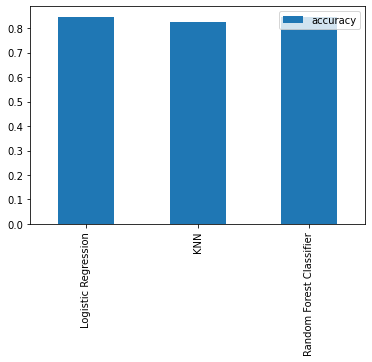

In [298]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

- We got almost same accuracy with all 3 algorithms.